### Convergence of Binomial to Gaussian

In the notes, we stated that the Gaussian is a good approximation to both the Binomial and the Poisson distributions for large mean and demonstrated this for the Poisson distribution. Lets see how it works for the Binomial.

First, the usual setup.

In [5]:
import numpy as np
from math import *
from scipy import stats 
import matplotlib.pyplot as plt

Below is the cell where you can set the Binomial parameters $n$ and $p$. We can then work out mean $\mu=np$ and variance $\sigma^2=np(1-p)$, and use a Gaussian with the same $\mu$ and $\sigma$

In [6]:
### Set binomial parameters
n=8
p=0.2
mu=n*p  #### mean of binomial
sig=sqrt(n*p*(1.0-p)) ### standard deviation of binomial

#### Set up the arrays
Now we make arrays to hold the data for the Binomial and Gaussian distributions. Note that we need two different x-arrays. The binomial is defined at a small number of integer values of $x$ whereas the Gaussian is a continuous curve, which we approximate by making a finely gridded array. (A note about normalisation: Note that the y-axes for the two distributions are different beasts - for the binomial the values are just *probability* whereas for the Gaussian the values are *probability density*. However, because the density is per-unit-x, and the binomial values are in steps of unit x, we can just plot one over the top of the other. If we are thinking about using the Gaussian to approximate a single $P(X_i)$ value of a binomial, this is therefore an appropriate comparison. But if we want to use the Gaussian integrated over some range to approximate a range of $P_i$ values, we need to think about the normalisation a bit more carefully!)  

In [7]:
# start by setting range
# note that Python cares about capitals... X is a different variable from x
Xmin=0    #integer values for binomial
Xmax=n
xmin=0.0            # float values for Gaussian
xmax=1.5*float(n)   # take the Gaussian curve a bit further on

# X and Y arrays for binomial values
X=list(range(Xmin,Xmax+1))   # set up X with integers from Xmin to Xmax
nptsX=len(X) 
Y=np.zeros(nptsX) # initialise Y  to hold probabilities

# array for plotting Gaussian
step=0.1  # step size for x-grid
x=np.arange(float(xmin),float(xmax+0.1),step)  
nptsx=len(x)
y=np.zeros(nptsx)

# now calculate the probabilities

for i in range(0,nptsX):
    Y[i]=stats.binom.pmf(i,n,p)

for i in range(0,nptsx):
    y[i]=stats.norm.pdf(x[i],mu,sig)


#### Set up the plot

Now we can set up the plot and compare the curves


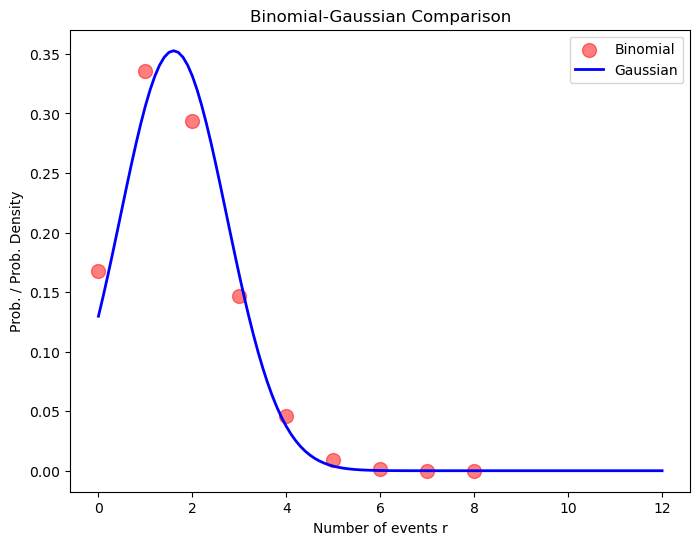

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot Binomial with circles where data is possible 
ax.scatter(X, Y, c='red', alpha=0.5, s=100, label='Binomial')

# Plot Gaussian lines
ax.plot(x, y, linewidth=2, color='blue', label='Gaussian')

# Set labels and title
ax.set_xlabel('Number of events r')
ax.set_ylabel('Prob. / Prob. Density')
ax.set_title('Binomial-Gaussian Comparison')

# Show legend
ax.legend(loc='upper right')

# Show the Matplotlib plot
plt.show()

#### Exploring

Try playing around with $n$ and $p$ values and re-running the notebook. You can see that for $p=0.5$ the Gaussian is an excellent approximation even for small values of $n$. For small or large values of $p$ its a lot worse, but even then it only takes modest values of $n$. 

#### Exercise

Of course, what value of $n$ is good enough depends on how accurate you want it to be. Try taking the *ratio* of Gaussian/Binomial, and (a) plotting that, and (b) seeing how large $n$ needs to be get, say, 5% accuracy, or 1% accuracy, or 0.1% accuracy.
